# GPT4 - Tokenizer

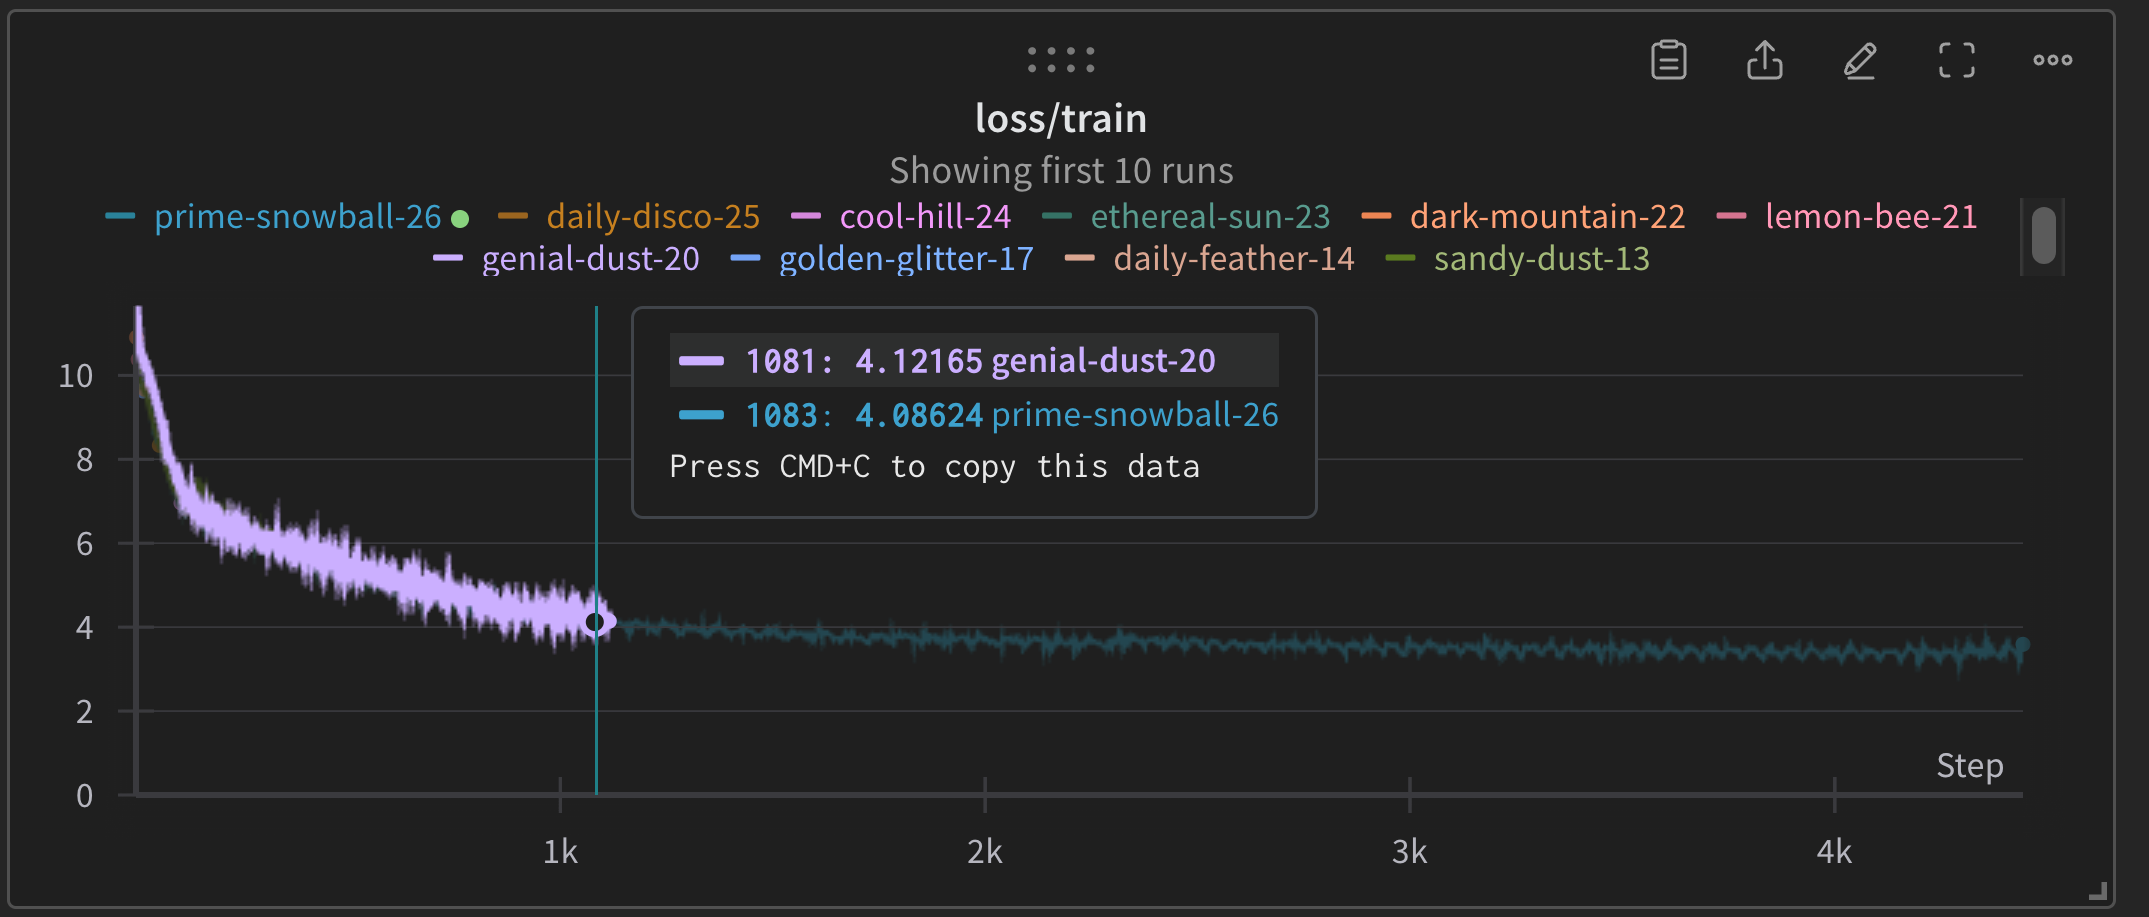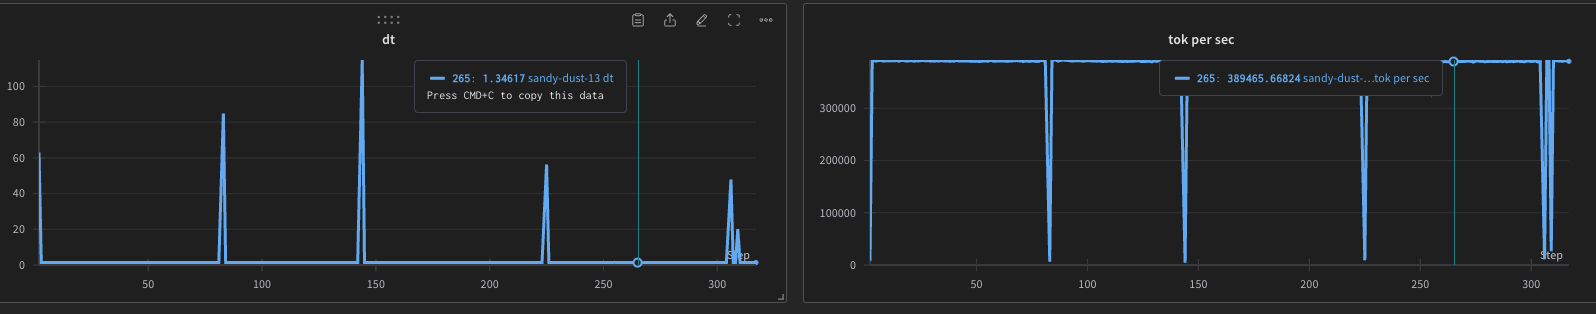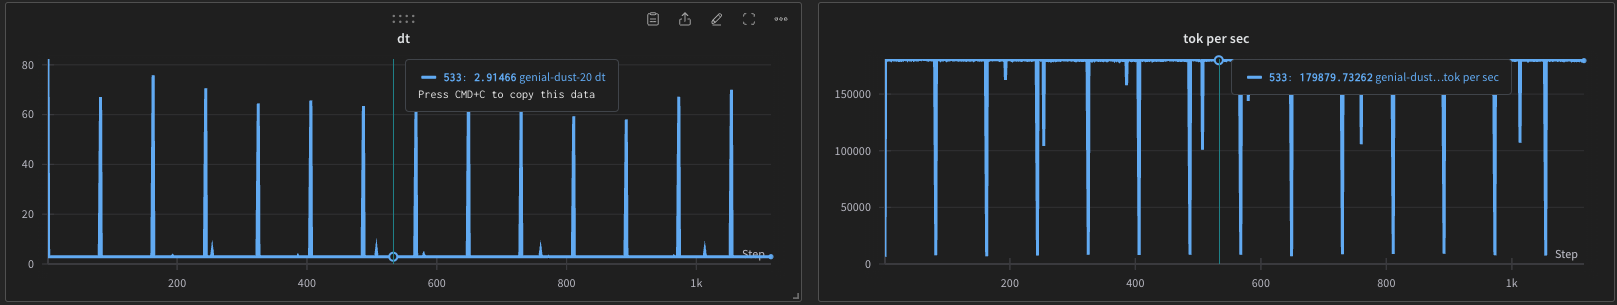


Genial-Dust-20 is GPT4 tokenizer--"Cl_100k_base"

- Single GPU run for both "Genial-Dust-20" (GPT4 tokenizer) and "Sandy-Dust-13" (GPT2 standard tokenizer)
- As seen in image above - GPT4 tokenizer suprisingly doesnt seem to have any improvement over using standard GPT2 tokenizer. When compared to prime-snowball-26 (GPT2 tokenizer, but with 4 GPU) at 1000 steps.
- Lower tokens per second process rate can be seen. Due to a series of potential factors:
  - Due to the fact that GPT2 tokenizer only has 50,257, whilst CL_100K_base, have, suprise surpise, 100k+ tokens, actually means we can't use FP16, since it can only represent 2**16 types of different numbers.
  - This means that our total_batch_size had to be shrunk from 2**19 to 2**18, else the GPU keeps running out of space.
  - And the main slowdown is likely due to how much slower information takes to be transferred, or memory overhead between HBM or CPU-GPU connection.
  - GPU also processes slower when using a higher float, even tho we've already tried TF32.


# 9/4 and 9/7 - 124m LN training

6 GPU vs 4 GPU

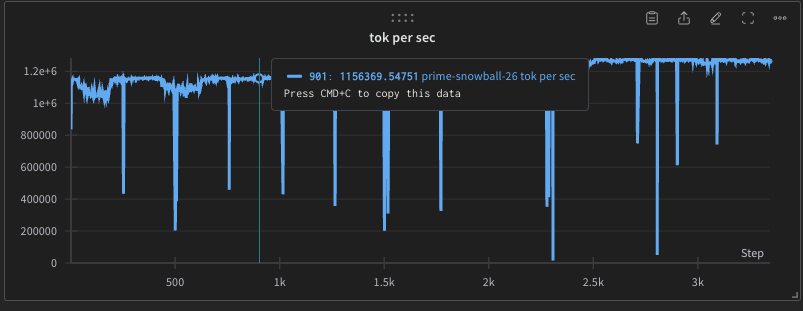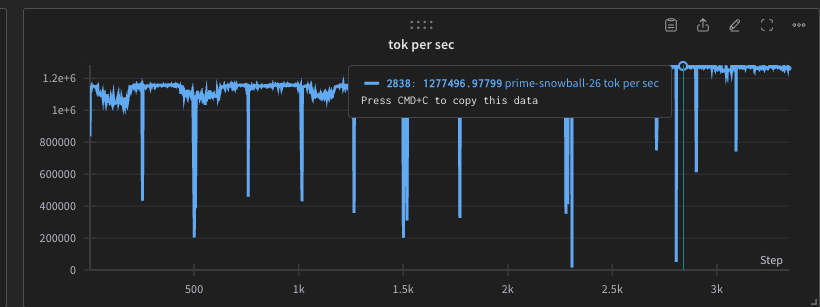

Side note to mention in methodology, for 6 GPU, the total_batch_size was 2 ** 17 * 3, since we had to fit sizing. Whilst, for 4 GPU, it was the standard 2 ** 19 recommended by OAI.

Potentially due to memory bottleneck, or smaller batch size. Using 6x H100 HBM3 is actually slower than 4x H100!! As seen in image above.